In [1]:
from nilearn import plotting
from nipype import Workflow, Node
from nipype.interfaces import utility as niu, fsl
from niworkflows.interfaces import NormalizeMotionParams

import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

hcp_path = '/CNIR09/GPU1_sync/data/Deep_pain_connectome/HCP_1200/'
unprep_path = hcp_path+'100206/unprocessed/3T/Diffusion/100206_3T_DWI_dir95_LR.nii.gz'
unprep_data = nib.load(unprep_path)

/home/hahnz/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


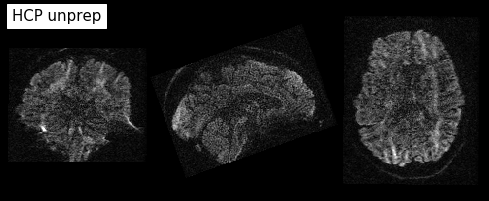

In [2]:
plotting.plot_anat(unprep_data.slicer[:,:,:,50], title='HCP unprep', display_mode='ortho', dim=-1, draw_cross=False, annotate=False)
plt.show()

In [3]:
workflow = Workflow(name='motion_correction')

input_node = Node(
    niu.IdentityInterface(fields=['bold_file', 'raw_ref_image']), 
    name='input')
output_node = Node(
    niu.IdentityInterface(fields=['xforms', 'movpar_file']),
    name='outputnode')

mcflirt = Node(fsl.MCFLIRT(save_mats=True, save_plots=True), name='mcflirt')

#fsl2itk = Node(MCFLIRT2ITK(), name='fsl2itk')

normalize_motion = Node(NormalizeMotionParams(format='FSL'), name="normalize_motion")

workflow.connect([
    (input_node, mcflirt, [('raw_ref_image', 'ref_file'), ('bold_file', 'in_file')]),
    #(inputnode, fsl2itk, [('raw_ref_image', 'in_source'), ('raw_ref_image', 'in_reference')]),
    #(mcflirt, fsl2itk, [('mat_file', 'in_files')]),
    (mcflirt, normalize_motion, [('par_file', 'in_file')]),
    #(fsl2itk, outputnode, [('out_file', 'xforms')]),
    (normalize_motion, output_node, [('out_file', 'movpar_file')]),
])

190911-21:31:30,246 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI


In [ ]:
from ...interfaces import MCFLIRT2ITK